<a href="https://colab.research.google.com/github/Vishnukvsvk/ML-Using-Python-IBM/blob/master/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-Means Clustering**
***Using randomly generated data***

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
# random.seed()  --> It is used to intialise a random number generation
np.random.seed(0)

In [0]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9) #cluster_std = standard deviation of cluster

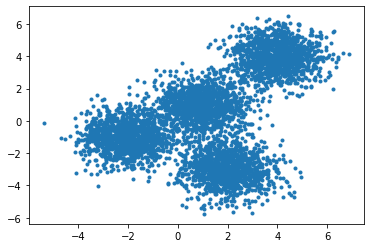

In [9]:
plt.scatter(X[:, 0], X[:, 1], marker='.')


**Setting up K-Means**

In [0]:
#  init='k-means++' --> Means choosing randoms seeds(centroids)
#  n_init : int, default: 10. Number of time the k-means algorithm will be run with different centroid seeds.

k_means = KMeans(n_clusters=4,init='k-means++',n_init=12) 

In [13]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Labelling every point in data**<br>
**Assingning data points to clusters**

In [14]:
k_means_labels = k_means.labels_
k_means_labels

array([2, 0, 0, ..., 1, 2, 2], dtype=int32)

**Cluster centers co-ordinates**

In [15]:
k_means_cluster_centers=k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687],
       [-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298]])

**Creating Visual Plot**

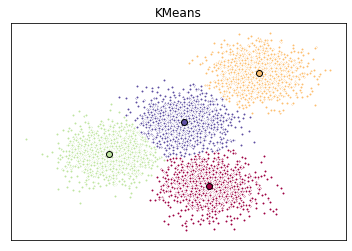

In [20]:
fig = plt.figure(figsize=(6,4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

#Creating plot
ax = fig.add_subplot(1,1,1)

for k,col in zip(range(len([[4,4],[-2, -1], [2, -3], [1, 1]])),colors):

  #Creating a list of all data-points corresponding to a particular cluster
  my_members = (k_means_labels == k)

  #Define centroid or cluster center
  cluster_center = k_means_cluster_centers[k]

  #Plot data points using color col
  ax.plot(X[my_members,0],X[my_members,1],'w',markerfacecolor=col,marker='.')

  # Plots the centroids with specified color, but with a darker outline
  ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks , y-axis ticks
ax.set_xticks(())
ax.set_yticks(())

# Show the plot
plt.show()